In [156]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 74s 1ms/step - loss: 2.0293 - acc: 0.2570: 3s  - ETA: 1s - loss: 2.0306 
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.8558 - acc: 0.3331
Epoch 3/10
50000/50000 [==============================] - 75s 2ms/step - loss: 1.7858 - acc: 0.3609
Epoch 4/10
50000/50000 [==============================] - 75s 1ms/step - loss: 1.7386 - acc: 0.3777
Epoch 5/10
50000/50000 [==============================] - 76s 2ms/step - loss: 1.7034 - acc: 0.3897
Epoch 6/10
50000/50000 [==============================] - 75s 1ms/step - loss: 1.6683 - acc: 0.4027
Epoch 7/10
50000/50000 [==============================] - 70s 1ms/step - loss: 1.6445 - acc: 0.4130
Epoch 8/10
50000/50000 [==============================] - 75s 1ms/step - loss: 1.6147 - acc: 0.4236
Epoch 9/10
50000/50000 [==============================] - 75s 2ms/step - loss: 1.5868 - acc: 0.4313
Epoch 10/10
50000/50000 [==============================] - 73s 1ms/st

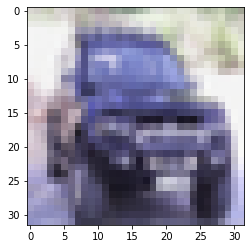

In [167]:
import matplotlib.pyplot as plt

number = 9
(trainx, trainy), (testx, testy) = cifar10.load_data()
plt.imshow(testx[number])

In [168]:
import numpy as np

predictions = model.predict([x_test])
i = np.argmax(predictions[number])
categories = ["airplane", "automobile", "bird", "cat", 
              "deer", "dog", "frog", "horse", "ship", "truck"]
print(categories[i])

automobile
